In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem
from AttentiveFP import save_smiles_dicts
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline   
import seaborn as sns
from scipy import interpolate
from matplotlib import cm

In [2]:
train_filename = "./data/IC50_O43614_1_train.csv"
test_filename = "./data/IC50_O43614_1_test.csv"
file_list1 = train_filename.split('/')
file1 = file_list1[-1]
file1 = file1[:-10]
filename = train_filename.replace('.csv','_test')
print(file1)

IC50_O43614_1


In [3]:
def add_canonical_smiles(df):
    smilesList = df.matched_cano_smiles.values
    print("number of all smiles: ",len(smilesList))
    atom_num_dist = []
    remained_smiles = []
    canonical_smiles_list = []
    for smiles in smilesList:
        try:        
            mol = Chem.MolFromSmiles(smiles)
            atom_num_dist.append(len(mol.GetAtoms()))
            remained_smiles.append(smiles)
            canonical_smiles_list.append(Chem.MolToSmiles(Chem.MolFromSmiles(smiles), isomericSmiles=True))
        except Exception as e:
            print('错误明细是:',e.__class__.__name__,e)
            pass
    print("number of successfully processed smiles: ", len(remained_smiles))
    df = df[df["smiles"].isin(remained_smiles)]
    df['cano_smiles'] =canonical_smiles_list
    return df

test_df = pd.read_csv(test_filename,header=0,names=["smiles","value","matched_smiles","matched_cano_smiles","matched_value"],usecols=[1,2,4,5,6])
test_df = add_canonical_smiles(test_df)
feature_dicts = save_smiles_dicts(test_df['cano_smiles'],filename)
test_df = test_df[test_df["cano_smiles"].isin(feature_dicts['smiles_to_atom_mask'].keys())]
test_df = test_df.reset_index(drop=True)
print(len(test_df))

number of all smiles:  81
number of successfully processed smiles:  81


/home/yinmingyue/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


feature dicts file saved as ./data/IC50_O43614_1_train_test.pickle
81


In [4]:
Generate_Data = np.load('./result/G_AFSE_'+file1+".npz", allow_pickle=True)
print(Generate_Data['arr_0'].shape, Generate_Data['arr_1'].shape, Generate_Data['arr_2'].shape, Generate_Data['arr_3'].shape, Generate_Data['arr_4'].shape, Generate_Data['arr_5'].shape, Generate_Data['arr_6'].shape, Generate_Data['arr_7'].shape)
feature_list = Generate_Data['arr_0']
d_list = Generate_Data['arr_1']
init_smiles = Generate_Data['arr_2']
generated_smiles = Generate_Data['arr_3']
generated_smiles_valid = Generate_Data['arr_4']
success_smiles = Generate_Data['arr_5']
test_predict = Generate_Data['arr_6']
generated_predict = Generate_Data['arr_7']

(81, 100) (81, 100) (73,) (73,) (69,) (5,) (81, 1) (69, 1)


In [228]:
feature_shortlist = []
d_shortlist = []
init_smiles_shortlist = []
generated_smiles_shortlist = []
test_predict_shortlist = []
generated_predict_shortlist = []
generated_valid_smiles_shortlist = []
for i, smi in enumerate(generated_smiles_valid):
    valid_index = np.argwhere(generated_smiles==generated_smiles_valid[i])[0]
    test_index = np.argwhere(test_df.cano_smiles.values==init_smiles[generated_smiles==generated_smiles_valid[i]]).flatten()
    if test_index.any():
        test_index = test_index[0]
        feature_shortlist.append(feature_list[i])
        d_shortlist.append(d_list[i])
        init_smiles_shortlist.append(init_smiles[i])
        test_predict_shortlist.append(test_predict[i])
        generated_predict_shortlist.append(generated_predict[i])
        generated_valid_smiles_shortlist.append(generated_smiles_valid[i])
        
feature_shortlist = np.array(feature_shortlist)
d_shortlist = np.array(d_shortlist)
test_predict_shortlist = np.array(test_predict_shortlist)
generated_predict_shortlist = np.array(generated_predict_shortlist)
print(feature_shortlist.shape, test_predict_shortlist.shape, generated_valid_smiles_shortlist)

(56, 100) (56, 1) ['COc1ccc(CC2COCCN2C(=O)c2ccccc2N2OCCO2)cc1C1OCCS1', 'COc1cccc(OC)c1C1CC(O)C(=O)N1Cc1ccc2oc3ccccc3c2c1', 'Cc1ccc(-n2nccn2)c(C(=O)N2CCCCC2Cc2cccc(-n3nccn3)c2)c1', 'Cc1ccc(-n2nccn2)c(C(=O)N2CCCC2c2nc(-c3ccccc3OC(O)(F)F)no2)n1', 'CCOc1ccccc1-c1noc(C2CCCN2C(=O)c2cc(O)ccc2-n2nccn2)n1', 'COc1cccc(OC)c1C1CC(Cl)C(=O)N1Cc1ccc(OC(C)(F)F)cc1', 'COc1cc(F)ccc1C1CC(C)C(=O)N1Cc1ccc(OC(F)(F)F)cc1', 'O=C(NC1CCCC1NC1OC2CCC(Cl)OC2S1)c1ccccc1-n1nccn1', 'COc1ncnc(OC)c1C1CCCC(=O)N1Cc1cccc(C2OCCCO2)c1', 'Cc1cc(C)cc(-c2n[nH]c(C3CCCN3C(=S)c3cc(C)ccc3-n3nccn3)n2)c1', 'Cc1ccc(C2OCCCO2)c(C(=O)N2CCCOC2Cn2cc(-c3ccc(F)cc3)cn2)n1', 'COc1cc(C(=O)N2CCCC2C2ONC(c3cccc(F)c3OC)O2)c(N2OCCO2)cc1F', 'CC1CCC2OCC(C)N(C(=O)c3ccc(Cl)cc3)C(C)C2O1', 'CC1CCC(N2OCCO2)C(C(=O)N2CCCC2C2ONC(c3ccccc3Cl)O2)O1', 'Cc1ccc(-n2nccn2)c(C(=O)N2CCCC2c2nsc(-c3cc(Cl)cc(C)n3)n2)c1', 'Cc1ccc(-c2ncccn2)c(C(=O)N2CCOC2Cn2ccc(-c3ccc(S)cc3)n2)c1', 'COC1OCOC(OC)C1C1CCCC(=O)N1Cc1csc(-c2ccccc2)n1', 'CCOc1ncccc1-c1noc(C2CCCN2C(=O)C2OC(F)OC(C)

/home/yinmingyue/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # Remove the CWD from sys.path while we load stuff.


In [240]:
success_index_list = np.array([], dtype=np.int16)
print(success_smiles)
for i, smi in enumerate(success_smiles):
    for j, valid in enumerate(generated_valid_smiles_shortlist):
        if valid==smi:
            success_index_list = np.append(success_index_list, j)
print(success_index_list)

['COc1cccc(OC)c1C1CC(O)C(=O)N1Cc1ccc2oc3ccccc3c2c1'
 'Cc1ccc(-n2nccn2)c(C(=O)N2CCCCC2Cc2cccc(-n3nccn3)c2)c1'
 'COc1cccc(OC)c1C1CC(O)C(=O)N1Cc1ccc(OC(F)(F)F)cc1'
 'COc1cccc(OC)c1C1CC(OC)C(=O)N1Cc1ccc(OC(F)(F)F)cc1'
 'COc1ccc2[nH]cc(CCn3cc(NC(=O)c4ncoc4-c4cccc(Cl)c4)cn3)c2c1']
[ 1  2 27 48]


In [254]:
from MulticoreTSNE import MulticoreTSNE as TSNE

AFSE_feature_list = np.concatenate((feature_shortlist, feature_shortlist+d_shortlist),axis=0).view()
print(AFSE_feature_list.shape)
Y1 = TSNE(n_jobs=4).fit_transform(AFSE_feature_list)

(112, 100)


In [256]:
np.savez('./result/tsne_'+file1, Y1)
active_space = np.load('./result/tsne_'+file1+".npz")
print(active_space['arr_0'].shape)
Y1 = active_space['arr_0']

(112, 2)


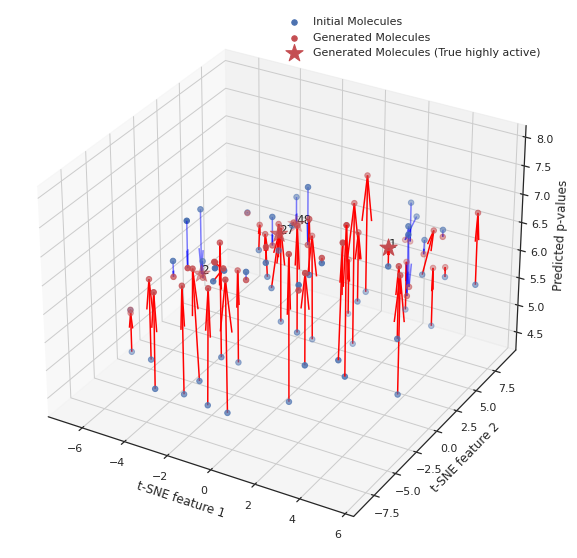

In [257]:
x = Y1[:,0]
y = Y1[:,1]
data_num = len(generated_predict_shortlist)
z = np.append(generated_predict_shortlist+9, test_predict_shortlist+9)
point = data_num

f = interpolate.interp2d(x, y, z, kind='cubic')
xnew = np.linspace(x.min(), x.max(), point)
ynew = np.linspace(y.min(), y.max(), point)
znew = f(xnew, ynew)

#修改x,y，z输入画图函数前的shape
xx1, yy1 = np.meshgrid(xnew, ynew)
newshape = (xx1.shape[0])*(xx1.shape[0])
y_input = xx1.reshape(newshape)
x_input = yy1.reshape(newshape)
z_input = znew.reshape(newshape)

#画图
frontsize = 15
pointsize = 30
sns.set(style='white')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
# ax.plot_trisurf(x_input,y_input,z_input,cmap=cm.coolwarm)
ax.scatter(x[:data_num], y[:data_num], z[:data_num], s=pointsize, c = 'b', label='Initial Molecules')
ax.scatter(x[data_num:], y[data_num:], z[data_num:], s=pointsize, c = 'r', label='Generated Molecules')
ax.scatter(x[success_index_list + data_num], y[success_index_list + data_num], z[success_index_list + data_num], 
           s=pointsize+300, c = 'r', marker='*',
           label='Generated Molecules (True highly active)')
for i in range(len(success_index_list)):
    index = success_index_list[i]+data_num
    ax.text(x[index],y[index],z[index],f'{index-data_num}')
for i in range(data_num):
    if z[data_num+i]>z[i]:
        ax.quiver(x[i],y[i],z[i],x[data_num+i]-x[i],y[data_num+i]-y[i],z[data_num+i]-z[i],color=(1, 0, 0, 1), arrow_length_ratio=0.4)
    else:
        ax.quiver(x[i],y[i],z[i],x[data_num+i]-x[i],y[data_num+i]-y[i],z[data_num+i]-z[i],color=(0, 0, 1, 0.5), arrow_length_ratio=0.4)
ax.set_xlabel('t-SNE feature 1')
ax.set_ylabel('t-SNE feature 2')
ax.set_zlabel('Predicted p-values')
ax.legend()
plt.show()
plt.close()

In [141]:
help(ax.quiver)

Help on method quiver in module mpl_toolkits.mplot3d.axes3d:

quiver(*args, length=1, arrow_length_ratio=0.3, pivot='tail', normalize=False, **kwargs) method of matplotlib.axes._subplots.Axes3DSubplot instance
    ax.quiver(X, Y, Z, U, V, W, /, length=1, arrow_length_ratio=.3, pivot='tail', normalize=False, **kwargs)
    
    Plot a 3D field of arrows.
    
    The arguments could be array-like or scalars, so long as they
    they can be broadcast together. The arguments can also be
    masked arrays. If an element in any of argument is masked, then
    that corresponding quiver element will not be plotted.
    
    Parameters
    ----------
    X, Y, Z : array-like
        The x, y and z coordinates of the arrow locations (default is
        tail of arrow; see *pivot* kwarg).
    
    U, V, W : array-like
        The x, y and z components of the arrow vectors.
    
    length : float, default: 1
        The length of each quiver.
    
    arrow_length_ratio : float, default: 0.3
     